In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [21]:
import numpy as np

from collections import OrderedDict
from statsmodels.nonparametric.kde import KDEUnivariate

from lint.models import Token

def token_density(token):
    
    # Get the raw token series.
    series = Token.token_series(token)
    
    # Use the ratio values as weights.
    weights = np.array(list(series.values()), dtype=float)

    # Fit the density estimate.
    density = KDEUnivariate(list(series.keys()))
    density.fit(fft=False, weights=weights, bw=2)

    samples = OrderedDict()

    for i in range(100):
        samples[i] = density.evaluate(i)[0]

    return samples

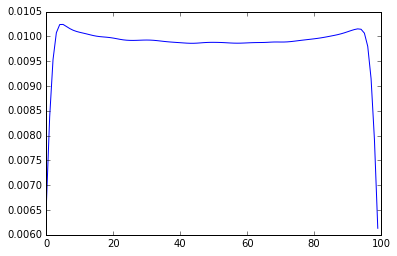

In [22]:
density = token_density('the')
plt.plot(*zip(*density.items()))
plt.show()